# Parametric Density Estimation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal
import seaborn as sns
%matplotlib inline

C:\Users\vinay\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\vinay\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\vinay\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
sample = normal(loc = 50 , scale = 5 , size = 1000) 

Explaination - generated 1000 points for sample based on popoulation parameters of mean 50 and std 5
thats why after the sample is made the mean and scale will not be exactly equal to population parameters

In [3]:
print(sample.mean())
print(sample.std())

50.070352195259446
4.881565180593476


In [4]:
sample.shape

(1000,)

(array([  5.,  44., 158., 254., 273., 183.,  73.,   9.,   0.,   1.]),
 array([34.70900662, 38.41763019, 42.12625375, 45.83487731, 49.54350087,
        53.25212444, 56.960748  , 60.66937156, 64.37799513, 68.08661869,
        71.79524225]),
 <BarContainer object of 10 artists>)

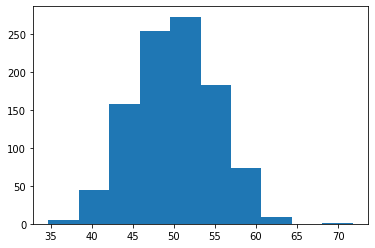

In [5]:
# plotting the histogram to know the distribution of sample to know how will our data look like 
plt.hist(sample, bins = 10)

After plotting the histogram we see that our data somelike normal

In [6]:
sample_mean = sample.mean()
sample_std = sample.std()

In [7]:
# fitting the values of mean and std with the pdf of normal , checkout the equation of normal distribution pdf.
from scipy.stats import norm
dist = norm(sample_mean , sample_std)

Important Note -  We fitted equation of pdf of normal with sample_mean and sample_std for the sake of simplicity.IN real Scenario What we would do is we will try to infer the population mean and std from sample_mean and sample_std.And then we will
fit the equation of pdf with the population parameters as this is the right thing to do .(checkout the formula for pdf of normal you will see it contains population mean and population std)

In [8]:
# now only thing is left the  x-values. for x-values we will create 100 linspace values from minimum value of sample till max

In [9]:
values = np.linspace(sample.min() , sample.max(), 100)

In [10]:
# for every x value we are calculating y value(Probability density)
density_estimation = [dist.pdf(value) for value in values]

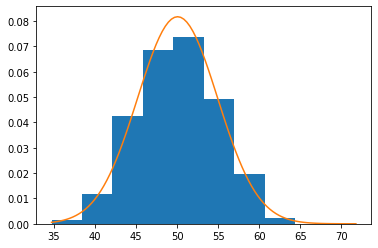

In [11]:
plt.hist(sample,bins = 10,density=True)
plt.plot(values , density_estimation)

In [12]:
# you can do same thing using sns.distplot

C:\Users\vinay\AppData\Local\Temp\ipykernel_3428\689646231.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample, kde=True, bins=10, color='blue')
C:\Users\vinay\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

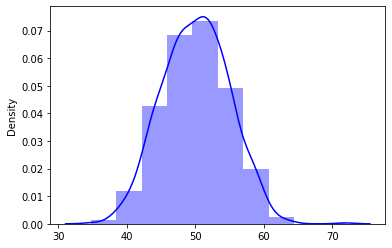

In [14]:
sns.distplot(sample, kde=True, bins=10, color='blue')


# Kernel Density Estimation

In [23]:
s1 = normal(loc = 20 , scale = 5 , size = 300)
s2 = normal(loc = 40 , scale = 5 , size = 700)
sample = np.hstack((s1 , s2))
sample = sample.reshape(1000 , 1)

(array([ 3.,  2.,  3.,  2.,  5., 15., 11., 10., 20., 14., 16., 25., 33.,
        34., 23., 24., 16.,  6., 10., 10., 10.,  6.,  7., 18., 18., 18.,
        23., 43., 46., 42., 54., 55., 49., 52., 50., 55., 36., 36., 29.,
        14., 16., 21.,  4.,  4.,  7.,  2.,  1.,  1.,  0.,  1.]),
 array([ 7.44648544,  8.4411606 ,  9.43583577, 10.43051093, 11.42518609,
        12.41986125, 13.41453642, 14.40921158, 15.40388674, 16.39856191,
        17.39323707, 18.38791223, 19.3825874 , 20.37726256, 21.37193772,
        22.36661288, 23.36128805, 24.35596321, 25.35063837, 26.34531354,
        27.3399887 , 28.33466386, 29.32933902, 30.32401419, 31.31868935,
        32.31336451, 33.30803968, 34.30271484, 35.29739   , 36.29206517,
        37.28674033, 38.28141549, 39.27609065, 40.27076582, 41.26544098,
        42.26011614, 43.25479131, 44.24946647, 45.24414163, 46.23881679,
        47.23349196, 48.22816712, 49.22284228, 50.21751745, 51.21219261,
        52.20686777, 53.20154294, 54.1962181 , 55.19089326,

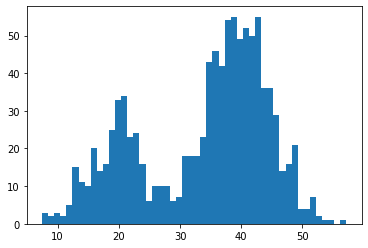

In [24]:
plt.hist(sample , bins = 50)

In [25]:
from sklearn.neighbors import KernelDensity
model = KernelDensity(bandwidth= 3 , kernel = 'gaussian')
model.fit(sample)

KernelDensity(bandwidth=3)

In [26]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape(100 , 1)
density_estimation = model.score_samples(values)
density_estimation = np.exp(density_estimation)

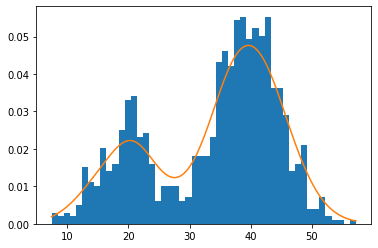

In [27]:
plt.hist(sample , bins = 50 , density=True)
plt.plot(values , density_estimation)

C:\Users\vinay\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

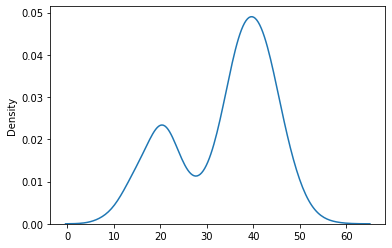

In [31]:
sns.kdeplot(sample.reshape(1000) , bw_adjust = 1)